In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import json
from IPython.core.display import HTML

### Входные данные

In [2]:
p = 7
S = 4
N = p ** S - 1

m = 2
n = S / m

J = p ** m - 1
L = N / (p ** m - 1)



# x^4+x^2+3x+5
h1 = [1, 0, 1, 3, 5]
A = 4
B = [2, 4, 6]
seed = [4, 0, 5, 5]

def generate_max_seq(p, N, S, B, seed):
    max_seq = seed.copy()
    for i in range(N - S):
        new_val = 0
        for j in range(len(B)):
            new_val += max_seq[i+j]*B[j]
        max_seq.append((new_val)%p)
    return max_seq

# list(enumerate(generate_max_seq(p, N, S, B, seed)))[1800:]
        

In [175]:
class MSequnce:
    def __init__(self, p, m, S, B, seed, A=0):
        self.p = p
        self.S = S
        self.B = B
        self.seed = seed
        self.N = p ** S - 1
        self.m = m
        self.n = S / m
        self.J = p ** m - 1
        self.L = self.N // (p ** m - 1)
        self.A = A
        self.vector = self._create_M_seq(p, S, B, seed)
        if self.A != 0:
            self.vector = self.shift(self.A)
    
    def _create_M_seq(self, p, S, B, seed):
        max_seq = seed.copy()
        for i in range(self.N - S):
            new_val = 0
            for j in range(len(B)):
                new_val += max_seq[i+j]*B[j]
            max_seq.append((new_val) % p)
        return np.reshape(max_seq, (-1, 1)).astype(int)
    
    def __copy__(self):
        return MSequnce(self.p, self.m, self.S, self.B, self.seed)
    
    def to_matrix(self):
        return np.reshape(self.vector, (self.J,self.L))
    
    def shift(self, t):
        new_seq = self.__copy__()
        new_seq.vector = np.roll(self.vector, t)
        return new_seq
    
    def show_vector(self, transpose=False):
        df = pd.DataFrame(self.vector.T, index=None) if transpose else pd.DataFrame(self.vector, index=None)
        return HTML(df.to_html())
    
    def show_table(self):
        df = pd.DataFrame(self.to_matrix(), index=None)
        return HTML(df.to_html())
    
    def save_as_vector(self, filepath):
        # save metadata as json
        df = pd.DataFrame(self.vector, index=None)
        df.to_excel(filepath, index=False, header=False)
        
class Experiment:
    def __init__(self, p, m_seq_lst, length_lst):
        if len(m_seq_lst) != len(length_lst):
            raise IndexError("Number of M-sequences should be equal to the number of lengths")
        

### МП таблица

In [4]:
m_seq_1 = MSequnce(p, m, S, B, seed)
m_seq_1.show_table()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,4,0,5,5,3,1,6,0,4,5,1,4,6,3,5,1,5,4,2,4,3,5,3,1,2,0,1,3,3,1,4,3,6,1,0,1,2,1,2,2,6,1,6,6,3,6,5,4,4,0
1,1,3,0,1,0,5,4,4,2,1,1,1,0,5,6,4,0,2,0,6,1,5,2,4,6,0,0,4,5,3,4,4,4,4,6,6,4,5,4,2,3,3,6,6,5,3,3,1,5,3
2,5,5,3,0,6,1,0,2,2,0,6,5,5,5,6,4,3,2,4,4,3,2,0,4,0,0,2,1,5,0,3,1,0,4,3,5,6,1,6,5,3,0,1,1,5,3,1,5,0,5
3,1,5,5,2,3,0,1,2,5,2,5,1,6,2,1,3,5,5,2,0,0,4,4,3,5,0,1,5,2,6,6,5,1,3,3,4,4,0,4,3,4,6,2,2,2,4,3,1,3,5
4,0,2,5,1,3,2,4,5,3,1,4,0,6,4,2,6,5,3,2,1,6,6,2,6,6,0,1,1,4,3,2,1,4,6,4,5,0,2,0,1,1,3,3,3,4,1,0,0,5,2
5,2,4,2,1,4,1,4,3,1,1,5,2,1,6,3,2,2,1,5,4,3,4,2,2,6,0,6,0,6,3,6,0,4,2,1,0,1,1,1,3,5,3,2,2,6,5,6,2,5,4
6,1,6,4,6,1,1,3,1,3,6,0,1,2,4,2,6,4,3,3,4,3,0,5,6,1,0,5,2,4,4,0,2,3,6,5,3,4,1,4,0,1,4,0,0,4,1,3,1,2,6
7,1,4,6,5,5,6,6,3,0,5,3,1,3,0,0,0,6,0,1,3,4,1,3,0,2,0,4,1,0,1,5,1,6,0,1,5,4,6,4,6,0,1,4,4,0,0,3,1,4,4
8,6,0,4,4,1,5,2,0,6,4,5,6,2,1,4,5,4,6,3,6,1,4,1,5,3,0,5,1,1,5,6,1,2,5,0,5,3,5,3,3,2,5,2,2,1,2,4,6,6,0
9,5,1,0,5,0,4,6,6,3,5,5,5,0,4,2,6,0,3,0,2,5,4,3,6,2,0,0,6,4,1,6,6,6,6,2,2,6,4,6,3,1,1,2,2,4,1,1,5,4,1


### Проверка правильности

In [5]:
m_seq_3 = MSequnce(p=3, m=3, S=6, B=[1, 2], seed=[0, 0, 0, 0, 0, 1])
m_seq_3.show_vector(transpose=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727
0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,1,1,1,0,0,2,0,0,1,0,1,2,0,2,1,2,2,2,1,1,2,0,0,1,0,2,2,0,2,1,1,0,2,1,1,0,1,1,1,0,1,2,0,0,1,2,2,2,0,2,2,0,0,2,1,0,2,0,1,1,1,1,2,2,0,0,0,2,0,2,0,0,1,2,1,2,0,2,2,1,2,2,1,0,1,2,0,1,1,2,2,2,2,0,2,0,0,0,2,1,2,0,0,1,1,2,2,0,2,0,2,0,2,1,2,1,2,1,1,2,1,2,1,0,2,1,2,1,1,1,1,2,1,0,0,0,2,1,1,0,0,1,1,0,1,0,2,0,1,2,1,1,2,2,2,1,0,2,0,0,1,1,1,2,0,2,0,0,2,2,1,2,0,1,0,1,2,2,2,1,2,2,0,0,1,2,0,2,0,2,2,2,1,2,1,0,0,1,2,1,1,0,2,2,1,0,1,1,0,1,1,2,0,1,2,0,2,2,2,2,2,1,0,0,0,0,1,1,0,0,0,2,0,1,0,0,1,2,2,1,0,2,2,0,1,1,1,0,2,2,0,0,1,1,0,2,0,2,0,1,1,2,1,2,2,0,2,1,2,0,2,1,1,2,2,1,1,0,2,0,1,0,1,1,2,2,1,2,0,2,0,1,2,2,1,2,2,2,0,1,2,0,0,2,2,2,2,0,1,0,0,0,2,2,1,0,0,1,0,1,1,0,2,1,2,0,1,1,1,2,2,2,0,0,2,0,0,2,0,1,2,0,1,2,2,2,2,2,2,0,0,0,0,0,2,0,0,0,0,1,2,0,0,0,2,2,2,0,0,1,0,0,2,0,2,1,0,1,2,1,1,1,2,2,1,0,0,2,0,1,1,0,1,2,2,0,1,2,2,0,2,2,2,0,2,1,0,0,2,1,1,1,0,1,1,0,0,1,2,0,1,0,2,2,2,2,1,1,0,0,0,1,0,1,0,0,2,1,2,1,0,1,1,2,1,1,2,0,2,1,0,2,2,1,1,1,1,0,1,0,0,0,1,2,1,0,0,2,2,1,1,0,1,0,1,0,1,2,1,2,1,2,2,1,2,1,2,0,1,2,1,2,2,2,2,1,2,0,0,0,1,2,2,0,0,2,2,0,2,0,1,0,2,1,2,2,1,1,1,2,0,1,0,0,2,2,2,1,0,1,0,0,1,1,2,1,0,2,0,2,1,1,1,2,1,1,0,0,2,1,0,1,0,1,1,1,2,1,2,0,0,2,1,2,2,0,1,1,2,0,2,2,0,2,2,1,0,2,1,0,1,1,1

In [6]:
m_seq_2 = MSequnce(p=7, m=2, S=2, B=[4, 6], seed=[2, 6])
m_seq_2.show_vector(transpose=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,2,6,2,1,0,4,3,6,6,4,6,3,0,5,2,4,4,5,4,2,0,1,6,5,5,1,5,6,0,3,4,1,1,3,1,4,0,2,5,3,3,2,3,5,0,6,1,2


In [7]:
def check_m_seq(m_seq):
    # число символов (N+1) / p
    for sym in range(1, m_seq.p):
        assert sum([1 for i in m_seq.vector if i == sym]) == int((m_seq.N+1) / m_seq.p)
    
    # число нулей (N+1) / p - 1
    assert sum([1 for i in m_seq.vector if i == 0]) == int((m_seq.N+1) / m_seq.p - 1)
    
check_m_seq(m_seq_1)    
check_m_seq(m_seq_2)    
check_m_seq(m_seq_3)

### Формирование ПСП1 и ПСП2

In [8]:
m_seq_1.save_as_vector('vector.xlsx')

In [9]:
def get_Li_metric(seq_1, seq_2):
    if seq_1.p != seq_2.p:
        raise IndexError("Sequences have different 'p' parameters: %s and %s" % (seq_1.p, seq_2.p))
        
    if seq_1.N != seq_2.N:
        raise IndexError("Sequences have different 'N' parameters: %s and %s" % (seq_1.N, seq_2.N))
        
    if len(seq_1.vector) != len(seq_1.vector):
        raise IndexError("Sequences should have equal lengths")
        
    res = 0
    p = seq_1.p
    for i in range(len(seq_1.vector)):
        diff = abs(seq_1.vector[i][0] - seq_2.vector[i][0])
        res += diff if diff <= p // 2 else p - diff
    return res

get_Li_metric(m_seq_1, m_seq_1.shift(15))

4116

<IPython.core.display.Javascript object>


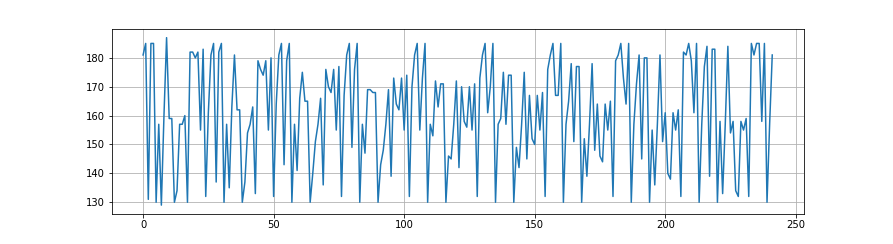

In [30]:
%matplotlib notebook
m_seq_4 = MSequnce(p=3, m=3, S=5, B=[1, 2, 2], seed=[0, 0, 0, 1])
m_seq_5 = MSequnce(p=3, m=3, S=5, B=[0, 2, 1], seed=[0, 0, 0, 1])

y = []
x = []
for i in range(m_seq_4.N):
    res = get_Li_metric(m_seq_5.shift(i), m_seq_4.shift(0))
    x.append(i)
    y.append(res)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.grid()

# fig.savefig("test.png")
plt.show()


In [183]:
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='none',
                    width='50%')


class Context:
    def __init__(self):
        self.objects = dict()
        

class  FieldCreator:
    def __init__(self, context):
        
        self.context = context
#         self.upload_in = FileUpload(
#             accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
#             multiple=False)
        
        self.field_name_in = Text(
            value='Field_1',
            description='Field Name:',
            disabled=False
        )
        
        self.p_in = Dropdown(
        options=[2, 3, 5, 7, 11],
        value=7,
        description='p:',
        disabled=False,
        )

        self.S_in = BoundedIntText(
            value=6,
            min=1,
            max=10,
            step=1,
            description='S:',
            disabled=False
        )

        self.m_in = BoundedIntText(
            value=2,
            min=1,
            max=10,
            step=1,
            description='m:',
            disabled=False
        )
        
        self.n_in = BoundedFloatText(
            value=self.S_in.value / self.m_in.value,
            description='n:',
            disabled=True
        )
        

        self.n_sum_in = IntText(
            value=100,
            min=1,
            step=1,
            description='n sum:',
            disabled=False
        )
        
        # shift (roll)
        self.A_in = IntText(
            value=0,
            step=1,
            description='A:',
            disabled=False
        )
        
        self.Ci_in = Text(
            value='2, 4, 6',
            description='Ci:',
            disabled=False
        )
        
        self.B_in = Text(
            value=''.join(['%sd%s ' % (val, idx) for idx, val in enumerate(self.Ci)]),
            description='B:',
            disabled=True
        )

        self.seed_in = Text(
            value='4, 0, 5, 5',
            description='NU:',
            disabled=False
        )
        
        self.create_in = Button(description="Create GMW")
        self.create_in.on_click(self.on_create)
        
        self.input_items = [v for k, v in self.__dict__.items() if k.endswith('_in')]
        for item in self.input_items: 
            item.observe(self.update, names='value')
        
    def update(self, change):
        self.n_in.value = self.S_in.value / self.m_in.value
        self.B_in.value = ''.join(['%sd%s ' % (val, idx) for idx, val in enumerate(self.Ci)])
    
    def on_create(self, b):
        f_name = self.field_name_in.value
        p = int(self.p_in.value)
        m = int(self.m_in.value)
        S = int(self.S_in.value)
        A = int(self.A_in.value)
        B = self.Ci  # yeah, need to rename it
        seed = self.seed
        m_seq = MSequnce(p, m, S, B, seed, A)
        self.context.objects[f_name] = m_seq
    
    @property
    def Ci(self):
        return [int(num) for num in self.Ci_in.value.replace(' ','').split(',') if num.isdigit()]
    
    @property
    def seed(self):
        return [int(num) for num in self.seed_in.value.replace(' ','').split(',') if num.isdigit()]  

context = Context()
fc = FieldCreator(context)
box = Box(children=fc.input_items, layout=box_layout)
box

Box(children=(Text(value='Field_1', description='Field Name:'), Dropdown(description='p:', index=3, options=(2…

In [187]:
class DisplayGMW:
    def __init__(self, context):
        self.context = context
        
        self.field_in = Dropdown(
            options=list(self.context.objects.keys()),
            description='GMW:',
            disabled=False,
        )
        self.input_items = [v for k, v in self.__dict__.items() if k.endswith('_in')]

display_GMW = DisplayGMW(context)
box = Box(children=display_GMW.input_items, layout=box_layout)
box

Box(children=(Dropdown(description='GMW:', options=('Field_1', 'Field_2'), value='Field_1'),), layout=Layout(a…